<a href="https://colab.research.google.com/github/0Kyumy0/Stellar_Classification_Project/blob/main/stellarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVE OF THIS PROJECT: classify if the stellar is a galaxy, star or quasar based on the characteristics given in the dataset.

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [67]:
filename = '/content/drive/MyDrive/DataScience/PROYECTO2/star_classification.csv'
df = pd.read_csv(filename)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Cleaning and exploration of the data

In [ ]:
df.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.duplicated().sum() # there are no duplicated rows

0

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df['rerun_ID'].describe()

count    100000.0
mean        301.0
std           0.0
min         301.0
25%         301.0
50%         301.0
75%         301.0
max         301.0
Name: rerun_ID, dtype: float64

In [ ]:
df['rerun_ID'].value_counts() # all the values are the same, so i'll delete it because it brings no value

301    100000
Name: rerun_ID, dtype: int64

In [ ]:
df['class'].unique() # the objective column does have the three values correctly

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [68]:
# I changed the diferent types of stellars in the column 'class' to nominal values. 
# since this models will have the same three types of stellars
df['class'] = df['class'].replace({'GALAXY':0, 'QSO':1, 'STAR':2})
df['class'].unique()

array([0, 1, 2])

In [69]:
df = df.drop(columns=['rerun_ID', 'obj_ID', 'run_ID', 'field_ID', 'fiber_ID', 'cam_col', 'spec_obj_ID'])

Why did i delete them?

* **obj_ID**: since it is an ID to the element it does not contribute to the model.

* **rerun_ID**: it doesn't have any correlation whatsoever with any columns. Also, according to what was observed previously, all the values are the same, so it does not add anything to the model.

## Graphs

In [5]:
df.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


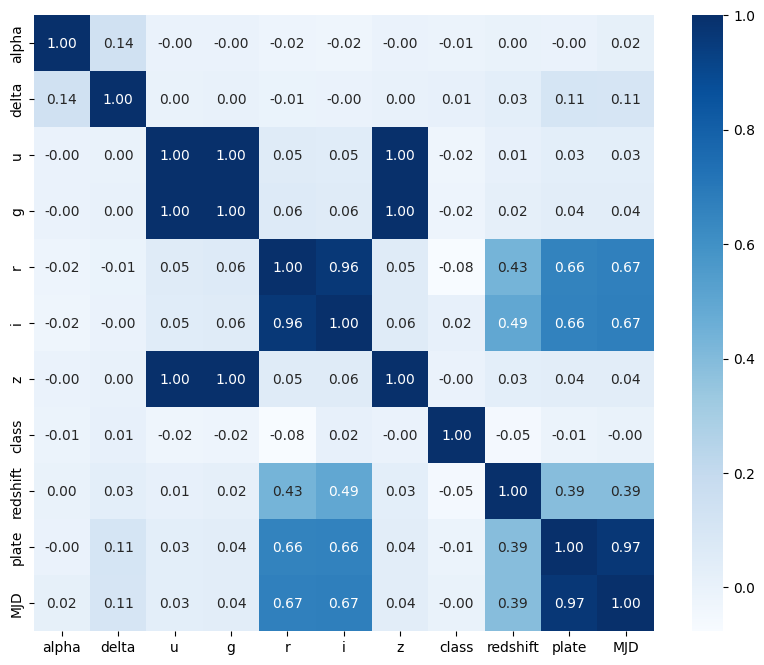

In [6]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8));
sns.heatmap(corr, cmap='Blues', annot=True, ax=ax, fmt='.2f');

According to what was observed in the correlation matrix, the correlation between them is quite varied. Therefore, it would be best to determine based on the results of the models which characteristics are truly relevant in the classification of stars.

In [ ]:
class_quanty = df['class'].value_counts()
class_quanty

0    59445
2    21594
1    18961
Name: class, dtype: int64

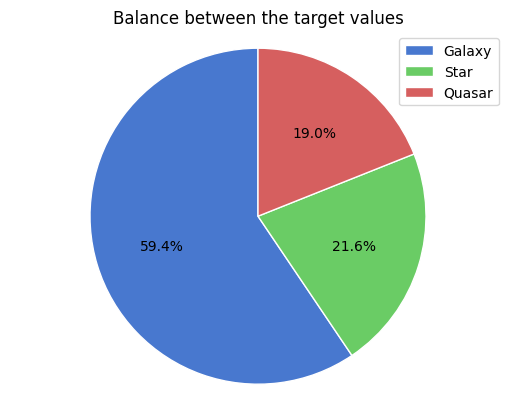

In [ ]:
plt.style.use('seaborn-v0_8-muted')

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

label = ['Galaxy', 'Star', 'Quasar']

ax1.pie(class_quanty, 
        startangle=90,
        autopct="%1.1f%%",
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'});
    
ax1.set_title('Balance between the target values');
ax1.legend(label, loc='best');
ax1.axis('equal');
plt.savefig('PieGraph.jpg')

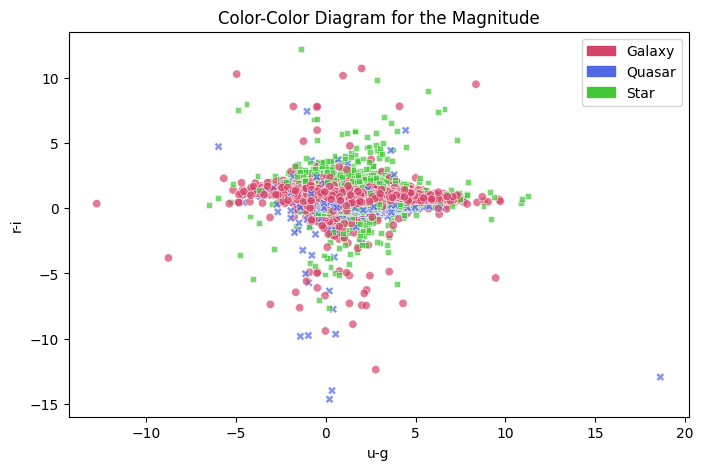

In [ ]:
metrics_ug = []
metrics_ri = []

for i in range(len(df)):
  _u_g = df['u'][i] - df['g'][i]
  _r_i = df['r'][i] - df['i'][i]
  metrics_ug.append(_u_g)
  metrics_ri.append(_r_i)

palette = ['#D64369', '#4F68E3', '#41C836']
label = ['Galaxy', 'Quasar', 'Star']

#-------------------------------------------

markers = {'Galaxy': 'o', 'Quasar': 's', 'Star': '^'}
colors = {"Galaxy": "#D64369", "Quasar": "#4F68E3", "Star": "#41C836"}

plt.figure(figsize=(8, 5), dpi=100)

handles = [mpatches.Patch(color=colors[label], label=label) for label in label]
for label in label:
    plt.scatter([], [], 
                c=colors[label], 
                marker=markers[label], 
                label=label);

sns.scatterplot(x=metrics_ug, y=metrics_ri, 
                hue=df['class'], 
                style=df['class'], 
                palette=palette, 
                alpha=0.7);

plt.xlabel('u-g')
plt.ylabel('r-i')
plt.title('Color-Color Diagram for the Magnitude')
plt.legend(handles=handles, loc='best');

La magnitud es una medida de la luminosidad de un objeto celeste, y se mide en una escala logarítmica inversa. Esto significa que cuanto más brillante sea un objeto, menor será su magnitud, y viceversa.

Cada filtro tiene una curva de respuesta diferente, lo que significa que la cantidad de luz que se detecta a través de cada filtro dependerá de la longitud de onda de la luz y de la curva de respuesta del filtro.

La diferencia de magnitud se calcula restando la magnitud del objeto medida en un filtro de la magnitud medida en otro filtro.

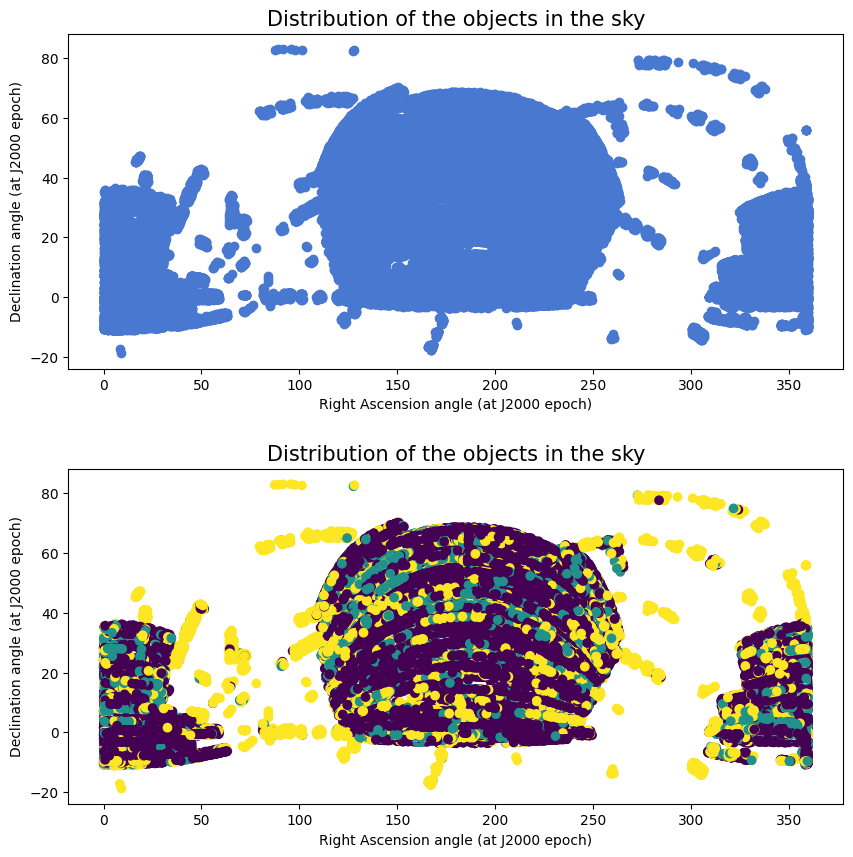

In [ ]:
fig2 = plt.figure(figsize=(10, 10),dpi=100)
plt.subplots_adjust(hspace=0.3)

ax1 = fig2.add_subplot(2,1,1)

ax1.scatter(df['alpha'], 
            df['delta']);
ax1.set_xlabel('Right Ascension angle (at J2000 epoch)');
ax1.set_ylabel('Declination angle (at J2000 epoch)');
ax1.set_title('Distribution of the objects in the sky', fontsize=15);

ax2 = fig2.add_subplot(2,1,2)

labels = ['Galaxy', 'Quasar', 'Star']

ax2.scatter(df['alpha'], 
            df['delta'], 
            c= df['class']);
            
ax2.set_xlabel('Right Ascension angle (at J2000 epoch)');
ax2.set_ylabel('Declination angle (at J2000 epoch)');
ax2.set_title('Distribution of the objects in the sky', fontsize=15);

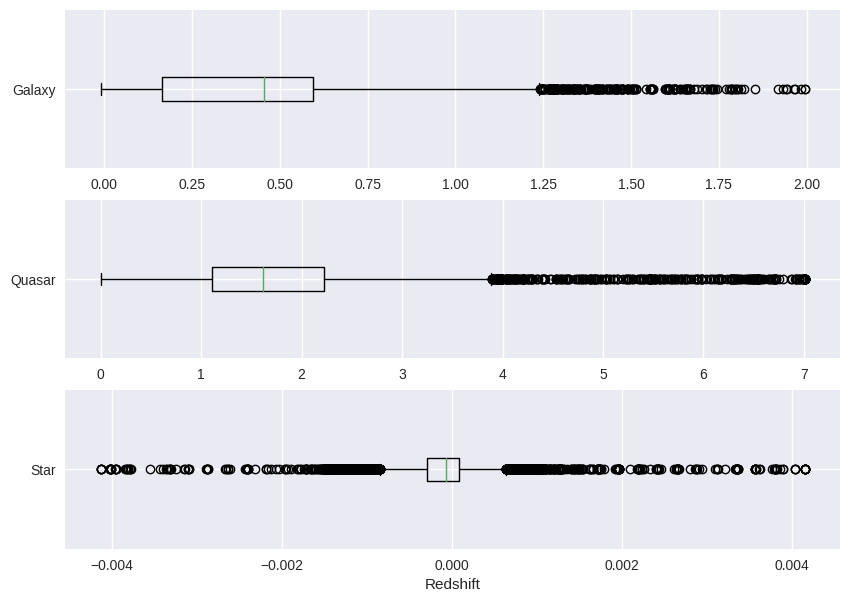

In [ ]:
filter_boxplot = df[['class', 'redshift']]
data_grouped = filter_boxplot.groupby('class')
boxplot_data_galaxy = [data_grouped.get_group(0)['redshift']]
boxplot_data_quasar = [data_grouped.get_group(1)['redshift']]
boxplot_data_star = [data_grouped.get_group(2)['redshift']]

fig3 = plt.figure(figsize=(10, 7), dpi=100)

plt.style.use('seaborn-v0_8')

# Boxplot for the redshift values of the class Galaxy
ax1 = fig3.add_subplot(3,1,1)
ax1.boxplot(boxplot_data_galaxy, vert=False, labels=['Galaxy'])

# Boxplot for the redshift values of the class Quasar
ax2 = fig3.add_subplot(3,1,2)
ax2.boxplot(boxplot_data_quasar, vert=False, labels=['Quasar'])

# Boxplot for the redshift values of the class Star
ax3 = fig3.add_subplot(3,1,3)
ax3.boxplot(boxplot_data_star, vert=False, labels=['Star'])


plt.xlabel('Redshift')

plt.show();

Con los gráficos anteriores lo que destaca es que para la clase de 'Quasar' se presenta gran cantidad de valores atípicos a comparación de las otras dos clases. Y la clase que presenta valores atípicos a nivel de milidecimales es para la clase 'Star', que a pesar de que presentan tanto en valores negativos como postivos, es en distancias menores a comparación de las otras dos clases.
Por útlimo, el valor medio de cada clase es diferente entre sí, lo cual puede significar una buena señal en cuestión de la identificación de cada clase, pero podría haber un overlap por los valores atípicos.

# Pre-processing

In [ ]:
df['class'].value_counts(normalize=True)

0    0.59445
2    0.21594
1    0.18961
Name: class, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  int64  
 8   redshift  100000 non-null  float64
 9   plate     100000 non-null  int64  
 10  MJD       100000 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 8.4 MB


In [70]:
y = df['class']
X = df.drop(columns='class')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [71]:
num_selector = make_column_selector(dtype_include=['float', 'int'])

In [72]:
scaler = StandardScaler()

In [73]:
main_pipeline = make_pipeline(scaler)
main_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [74]:
num_tuple = (main_pipeline, num_selector)

In [75]:
preprocessor = make_column_transformer(num_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe923045ed0>)])

In [76]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe923045ed0>)])

In [77]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [78]:
X_train_df_processed = pd.DataFrame(X_train_processed)
X_train_df_processed

,0,1,2,3,4,5,6,7,8,9
0,-1.740607,-1.269131,0.034872,0.021201,0.100999,-0.207994,-0.013973,-0.790997,-1.236158,-1.469317
1,-0.547432,-0.793239,-0.113491,-0.101766,-1.732568,-1.585932,-0.064722,-0.790703,-0.871364,-0.850741
2,0.674484,0.694980,-0.041628,-0.005592,0.302461,0.502114,0.048253,1.329799,1.893218,1.466984
3,-1.658441,-0.317294,0.007189,0.034329,0.503038,0.394969,0.020834,-0.110461,-0.003918,0.146838
4,1.456375,-0.666642,-0.016454,-0.016642,-0.203721,-0.037337,0.008007,-0.790991,-1.101689,-1.302777
...,...,...,...,...,...,...,...,...,...,...
74995,0.503571,0.755214,0.036143,0.057710,0.869466,0.577637,0.021408,0.010214,1.134838,0.836235
74996,-1.741011,0.190020,0.025126,0.075776,0.766823,0.335241,0.008005,0.148579,0.383232,0.360961
74997,-0.157207,0.810657,0.076483,0.040334,0.459301,0.235629,0.009662,-0.073945,-0.174291,0.020688
74998,-0.559889,0.992917,0.063926,0.053210,0.618211,0.597009,0.034113,-0.250587,0.418120,0.407990


# Models

## Decision Tree Classifier

In [ ]:
param_grid = [
    {'max_depth': list(range(15,25)),
    'min_samples_leaf': list(range(5,15))}
]

dec_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dec_tree, param_grid, cv=5)

grid_search.fit(X_train_processed, y_train)

grid_search.best_params_

{'max_depth': 18, 'min_samples_leaf': 13}

In [46]:
dec_tree = DecisionTreeClassifier(max_depth=18, min_samples_leaf = 13, random_state=42)
dec_tree.fit(X_train_processed, y_train)
dec_tree_predicts = dec_tree.predict(X_test_processed)

print(dec_tree.score(X_train_processed, y_train)*100)
print(dec_tree.score(X_test_processed, y_test)*100)

98.12133333333334
97.592


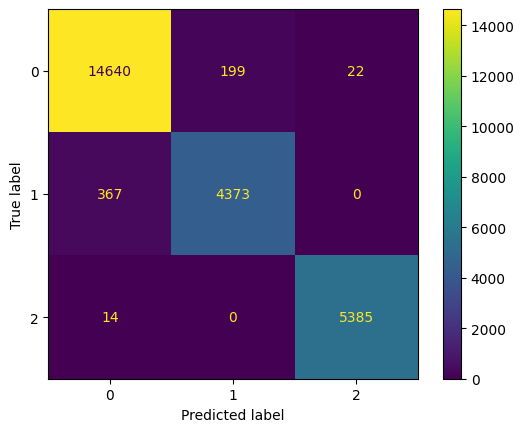

In [47]:
cm = confusion_matrix(y_test, dec_tree_predicts)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show();

In [48]:
print('Accuracy score for the test data:', accuracy_score(y_test, dec_tree_predicts)*100)
print('\n')
print(classification_report(y_test, dec_tree_predicts))

Accuracy score for the test data: 97.592


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14861
           1       0.96      0.92      0.94      4740
           2       1.00      1.00      1.00      5399

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



## Bagging Tree

In [ ]:
param_grid = [
    {'n_estimators': list(range(1, 15))}
]

bagclass = BaggingClassifier(random_state=42)

grid_search = GridSearchCV(bagclass, param_grid, cv=5)

grid_search.fit(X_train_processed, y_train)

grid_search.best_params_

{'n_estimators': 13}

In [43]:
bagclass = BaggingClassifier(n_estimators = 13, random_state=42)
bagclass.fit(X_train_processed, y_train)
bagclass_predicts = bagclass.predict(X_test_processed)

print(bagclass.score(X_train_processed, y_train)*100)
print(bagclass.score(X_test_processed, y_test)*100)

99.85199999999999
97.92


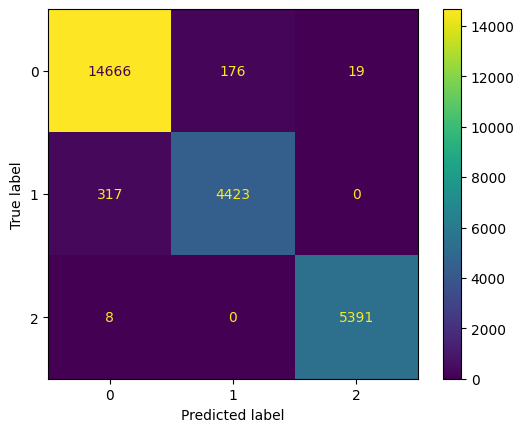

In [44]:
cm = confusion_matrix(y_test, bagclass_predicts)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show();

In [45]:
print('Accuracy score for the test data:', accuracy_score(y_test, bagclass_predicts)*100)
print('\n')
print(classification_report(y_test, bagclass_predicts))

Accuracy score for the test data: 97.92


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14861
           1       0.96      0.93      0.95      4740
           2       1.00      1.00      1.00      5399

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



## Random Forest

In [ ]:
param_grid = [
    {'n_estimators': [100, 150, 200],
     'max_depth' : [50, 100]}
]

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(X_train_processed, y_train)

grid_search.best_params_

{'max_depth': 50, 'n_estimators': 150}

In [40]:
rf = RandomForestClassifier(n_estimators = 150, max_depth = 50, random_state=42)
rf.fit(X_train_processed, y_train)
rf_predicts = rf.predict(X_test_processed)

print(rf.score(X_train_processed, y_train)*100)
print(rf.score(X_test_processed, y_test)*100)

100.0
98.004


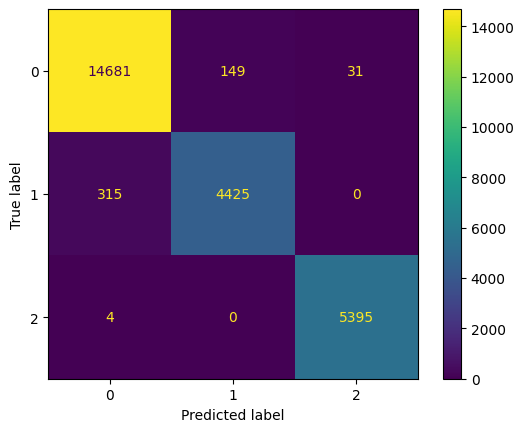

In [41]:
cm = confusion_matrix(y_test, rf_predicts)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show();

In [42]:
print('Accuracy score for the test data:', accuracy_score(y_test, rf_predicts)*100)
print('\n')
print(classification_report(y_test, rf_predicts))

Accuracy score for the test data: 98.004


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14861
           1       0.97      0.93      0.95      4740
           2       0.99      1.00      1.00      5399

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



## KNN

In [ ]:
param_grid = [
    {'n_neighbors': list(range(1,8))}
]

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_processed, y_train)

grid_search.best_params_

{'n_neighbors': 3}

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_processed, y_train)
knn_predict = knn.predict(X_test_processed)

print(knn.score(X_train_processed, y_train)*100)
print(knn.score(X_test_processed, y_test)*100)

96.39466666666667
94.336


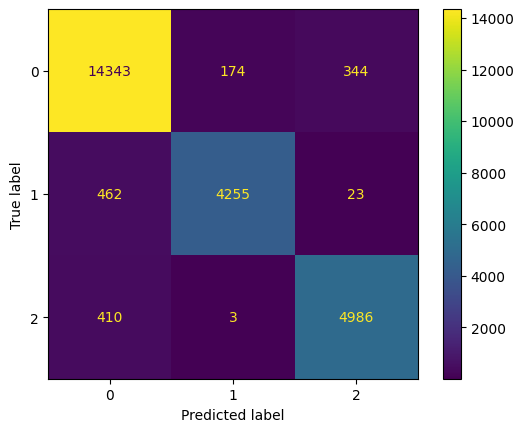

In [38]:
cm = confusion_matrix(y_test, knn_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show();

In [39]:
print('Accuracy score for the test data:', accuracy_score(y_test, knn_predict)*100)
print('\n')
print(classification_report(y_test, knn_predict))

Accuracy score for the test data: 94.336


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14861
           1       0.96      0.90      0.93      4740
           2       0.93      0.92      0.93      5399

    accuracy                           0.94     25000
   macro avg       0.94      0.93      0.94     25000
weighted avg       0.94      0.94      0.94     25000



## Logistic Regresion

In [80]:
logreg = LogisticRegression(C = 1, solver ='liblinear', penalty = 'l1', multi_class = 'ovr', max_iter=1000)
logreg.fit(X_train_processed, y_train)
#logreg_predict = logreg.predict(X_test_processed)

print(logreg.score(X_train_processed, y_train)*100)
print(logreg.score(X_test_processed, y_test)*100)

94.87066666666666
95.012


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1', multi_class='ovr')
  log_reg.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train_processed, y_train))
  test_scores.append(log_reg.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Gradient Boosting

In [34]:
gbc = GradientBoostingClassifier(max_depth = 7, random_state=42)
gbc.fit(X_train_processed, y_train)
gbc_predicts = gbc.predict(X_test_processed)

print(gbc.score(X_train_processed, y_train)*100)
print(gbc.score(X_test_processed, y_test)*100)

98.98133333333334
97.924


In [19]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

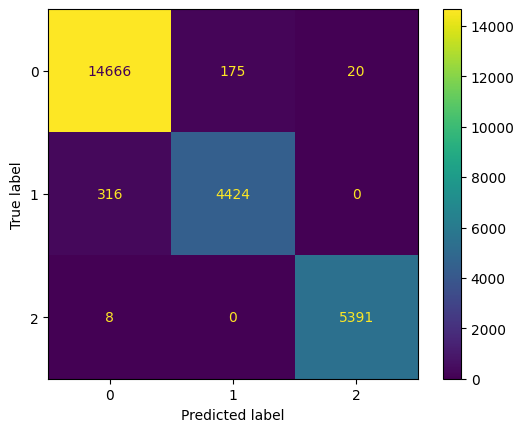

In [35]:
cm = confusion_matrix(y_test, gbc_predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show();

In [36]:
print('Accuracy score for the test data:', accuracy_score(y_test, gbc_predicts)*100)
print('\n')
print(classification_report(y_test, gbc_predicts))

Accuracy score for the test data: 97.924


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14861
           1       0.96      0.93      0.95      4740
           2       1.00      1.00      1.00      5399

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



## XGBoost

In [79]:
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

xgb_predicts = xgb.predict(X_test_processed)

print(xgb.score(X_train_processed, y_train)*100)
print(xgb.score(X_test_processed, y_test)*100)

99.00666666666666
98.024


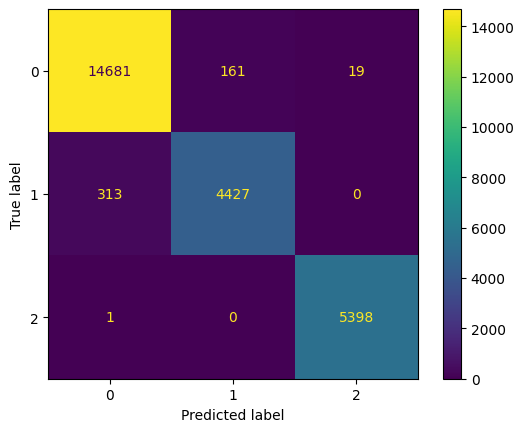

In [82]:
cm = confusion_matrix(y_test, xgb_predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show();

In [83]:
print('Accuracy score for the test data:', accuracy_score(y_test, xgb_predicts)*100)
print('\n')
print(classification_report(y_test, xgb_predicts))

Accuracy score for the test data: 98.024


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14861
           1       0.96      0.93      0.95      4740
           2       1.00      1.00      1.00      5399

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000

